df overview,  determine problems and key questions to perform task, rename columns,  dealing with duplicates , missed data , timestamp  and screen record test

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
mvp=["n.a.","?","NA","n/a", "na", "--"]

In [3]:
df=pd.read_csv("Salary_Survey.csv", na_values=mvp)

In [4]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(28178, 23)

In [6]:

# rename titles for columns change text to number, number to relevant title
df.columns = range(len(df.columns))

In [7]:
#lets replase numbers for text format to rename columns 
new_column_names = ["column_" + str(i) for i in range(len(df.columns))]
df.columns = new_column_names

In [8]:
df.head(2)

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#rename columns 
df = df.rename(columns={"column_0":"Timestump","column_1": "Age","column_16":"Gender","column_15": "Highest_Degree"})

In [10]:
df = df.rename(columns={"column_2":"Industry","column_3": "Job title","column_4":"Job context","column_5":"Annual Salary","column_6":"Bonus","column_7":"Currency","column_8":"Currency other","column_9":"Income context"})

In [11]:
df = df.rename(columns={"column_10":"Country","column_11": "State","column_12":"City","column_13": "Work_Exp","column_14": "Rel_Exp"})

In [12]:
non_null_counts = df.count()
print(non_null_counts)

Timestump         28085
Age               28085
Industry          28011
Job title         28083
Job context        7266
Annual Salary     28085
Bonus             20780
Currency          28085
Currency other      208
Income context     3044
Country           28084
State             23059
City              27998
Work_Exp          28085
Rel_Exp           28085
Highest_Degree    27863
Gender            27914
column_17             0
column_18             0
column_19             0
column_20             0
column_21             0
column_22             0
dtype: int64


In [13]:
#no non-null values -all values in the columns 17-22 are missing or null,we can delete them
df.drop(columns=['column_17','column_18','column_19','column_20','column_21','column_22'], inplace=True)

In [14]:
#detecting duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (92, 17)


In [15]:
# Calculate the sum of non-null values   for 

total_sum_non_null = duplicate_rows_df.count(axis=1).sum()
print("Total sum of non-null values:", total_sum_non_null)

Total sum of non-null values: 0


In [16]:
# Print duplicate rows with null values
print(duplicate_rows_df[duplicate_rows_df.isnull().any(axis=1)])

      Timestump  Age Industry Job title Job context Annual Salary  Bonus  \
28086       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28087       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28088       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28089       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28090       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
...         ...  ...      ...       ...         ...           ...    ...   
28173       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28174       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28175       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28176       NaN  NaN      NaN       NaN         NaN           NaN    NaN   
28177       NaN  NaN      NaN       NaN         NaN           NaN    NaN   

      Currency Currency other Income context Country State City Work_Exp  \
28086      

In [17]:
#we can exclude now  93 duplicates rows ,as we did for columns before
df = df.iloc[:-93]



In [18]:
#review 
df.tail(2)

,Timestump,Age,Industry,Job title,Job context,Annual Salary,Bonus,Currency,Currency other,Income context,Country,State,City,Work_Exp,Rel_Exp,Highest_Degree,Gender
28083,10/4/2024 13:05:24,18-24,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,NaN,NaN,United States,Rhode Island,Jhonston,1 year or less,1 year or less,College degree,Man
28084,10/7/2024 5:17:56,65 or over,Social networks,Content creator,NaN,2000000,NaN,USD,NaN,NaN,Taiwan,"Utah, Wisconsin",Milwaukee,41 years or more,2 - 4 years,PhD,Non-binary


In [19]:
#review shape update
df.shape

(28085, 17)

In [20]:
# identifying columns with missing data and deciding how to handle  missing values
print(df.isnull().sum())


Timestump             0
Age                   0
Industry             74
Job title             2
Job context       20819
Annual Salary         0
Bonus              7305
Currency              0
Currency other    27877
Income context    25041
Country               1
State              5026
City                 87
Work_Exp              0
Rel_Exp               0
Highest_Degree      222
Gender              171
dtype: int64


In [21]:
#replace missing values with (Unknown')/'NA'
#  for missed values 'City',replace with equal value from 'Country'
df['Industry'] = df['Industry'].fillna('Unknown')
df['Bonus']=df['Bonus'].fillna('0')
df['Country']=df['Country'].fillna('Unknown')
df['State']=df['State'].fillna('NA')
df['City']=df['City'].fillna(df['Country'])
df['Currency other']=df['Currency other'].fillna('NA')


   

In [22]:
#replsce missing data with addutuinal column info/  fill remain with 'Unknown'
df['Job title'] = df['Job title'].fillna('Job context')
df['Job title'] = df['Job title'].fillna('Unknown')
df['Job context'] = df['Job context'].fillna('Unknown')




 determine  target variable(“Annual salary” ), dropping irrelevant columns,  # Main target - annual salary, year mention in a title ,values in a Timestump nonsuffisient impact=drop , 'Job context'- most of the data missed , but  can replace missed data for Jod title and , categotical variable ' Income context' do not impact  numerical data in Target variable 


In [23]:
#take down non relevant to the target variable columns Timestamp ,'Income context'
# Main target - annual salary, year mention in a title , 
df.drop(columns=['Timestump','Income context'], inplace=True)

In [24]:
## Clean data from ',', convert to integrets 
df['Annual Salary'] = df['Annual Salary'].str.replace(',','').astype(int)


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html     sort values , ascending=False)

In [25]:
#find outliers , top 5 salaryes
df = df.sort_values('Annual Salary', ascending=False)

print(df['Annual Salary'].head(5))

28055    6000070000
11454     870000000
18984     180000000
27902     120000000
3605      102000000
Name: Annual Salary, dtype: int64


In [26]:

print(df[['Annual Salary','Bonus']].tail(5))

       Annual Salary Bonus
20470              0     0
8739               0   0.0
26562              0   0.0
27996              0   0.0
13537              0   0.0


to  handle missing values for Annual salary and bonus , I create a new variable 'Total Income' (sum of salary and bonus0 filter   1<>10 000    as total incime can not be less then 10 000, and after filtering the duplicate rows with  1 or 0 ,less then 10000   drop fro Annual salary 

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html   coerse   convert non-numeric values to NaN,  avoid potential errors 

In [27]:
# Handle missing values ,determine outliers
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'], errors='coerce')

#Descriptive statistics for Annual Salary  to find outliers
print(df['Annual Salary'].describe().astype(int))

count         28085
mean         361242
std        36207917
min               0
25%           54000
50%           75000
75%          110000
max      6000070000
Name: Annual Salary, dtype: int64


min  0    , -   we have a number of outliers , we can compare them to Bonus and Currency  ,before drop from DF .As salary represented by different currency, review what is a top value , check  if missing values in cureency -  we need to clean them from data   .For filter  i use Accending method https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [28]:
#  Annual  salary 6000070000 CAD   can not be realistic, just  this value  has misssed - , replase with median 65000
# 6000070000 with 65000 in 'Annual Salary'
df.loc[df['Annual Salary'] == 6000070000, 'Annual Salary'] = 65000

In [29]:
# Print  comdined df

print(df[['Annual Salary','Currency','Bonus']].head(10))

       Annual Salary Currency        Bonus
28055          65000      CAD            0
11454      870000000    Other  120000000.0
18984      180000000    Other            0
27902      120000000    Other            0
3605       102000000      USD            0
23490       43800000    Other     150000.0
18498       38000000    Other            0
22871       36000000    Other          0.0
11234       27000000    Other            0
24443       20800000      JPY    1000000.0


In [30]:

print(df['Bonus'].dtype)

object


Bonus  is additional to Annual salary  numerical category, no needs to drop missing duplicates: convert (df['Bonus'] to   integrets, replace missed data with'0 

In [31]:
# Remove non-numeric characters and convert to numeric

df['Bonus'] = pd.to_numeric(df['Bonus'], errors='coerce')

# Replace missing values with 0
df['Bonus'].fillna(0, inplace=True)

In [32]:

missing_values = df['Bonus'].isna().sum()
print(f"Number of missing values in 'Bonus': {missing_values}")

Number of missing values in 'Bonus': 0


In [33]:
df['Bonus'] = df['Bonus'].astype(int)

most of the top salary   values represented by currensy tipe'Other' ,that make them only numbers - I filter all categorycal data fom 'Currency'  = 'Other'  and drop allrelated  rows 

In [34]:
# most of outliers in Annual salary  without value ,we can  drop all rows were Currency 'Other'
# make   all upper 
df['Currency'] = df['Currency'].str.upper()

In [35]:
# Identify duplicate rows where 'Currency' is 'OTHER'
duplicate_rows_df = df[df.duplicated(subset=['Currency'], keep=False) & (df['Currency'] == 'OTHER')]

# Drop duplicate rows
df = df.drop(duplicate_rows_df.index)

In [36]:
#  determine unique categories  upgate 
df["Currency"].unique() 


array(['CAD', 'USD', 'JPY', 'SEK', 'ZAR', 'CHF', 'AUD/NZD', 'GBP', 'HKD',
       'EUR'], dtype=object)

In [37]:
# Frequency table for 'Gender_distribution = df['Gender'].value_counts()
Currency_distribution = df['Currency'].value_counts()
print(Currency_distribution)

USD        23395
CAD         1673
GBP         1591
EUR          644
AUD/NZD      504
SEK           37
CHF           37
JPY           23
ZAR           16
HKD            4
Name: Currency, dtype: int64


In [38]:
#create new combined  Total income  

df['Total_Income'] = df['Annual Salary'] + df['Bonus']
df[['Annual Salary','Bonus','Total_Income','Currency']].tail(10)

,Annual Salary,Bonus,Total_Income,Currency
26748,0,0,0,USD
28015,0,0,0,GBP
23028,0,0,0,USD
23983,0,200000,200000,USD
10362,0,0,0,USD
20470,0,0,0,USD
8739,0,0,0,USD
26562,0,0,0,USD
27996,0,0,0,USD
13537,0,0,0,USD


#by using combined variable I saved some informative data for main target 'Annual salary' 

In [39]:

#assuming total income  can not be less then 10 000 , filter and drop  relevant rows  were value <=10000 , including 0 
df = df[df['Total_Income'] > 10000]

In [40]:
#correlations between variables 
df[['Total_Income','Currency','Job title','Age','Country','Currency other','Highest_Degree','Industry']].head(6)

,Total_Income,Currency,Job title,Age,Country,Currency other,Highest_Degree,Industry
28055,65000,CAD,Investment Banking Analyst,18-24,Canada,NA,College degree,"Accounting, Banking & Finance"
3605,102000000,USD,Operations Manager,25-34,Colombia,COP,Some college,Utilities & Telecommunications
24443,21800000,JPY,Voice Actor,25-34,Japan,NA,College degree,Entertainment
10654,11500000,JPY,Compliance Manager,25-34,Japan,NA,"Professional degree (MD, JD, etc.)",Retail
28021,10000299,USD,bum,18-24,usa,rice,"Professional degree (MD, JD, etc.)",Unknown
18027,9400000,JPY,Backend system dev,25-34,Japan,NA,PhD,Computing or Tech


current output below given as method demonstration, numbers  can not represent group correctly ,as valuees  for  currensy did not  converted  for one same currency ,for first look some outliers can be corrected (for Columbia) or take down as for row wit index 28021   no clear info given and currency USD /Rtice  can be misleading for furter analyse 

In [41]:
df = df.drop(index=28021)
df.loc[3605, 'Currency'] = 'COP'

In [42]:

#Descriptive statistics for Annual Salary (   
print(df['Total_Income'].describe().astype(int))

count        27783
mean        107940
std         655984
min          10070
25%          55500
50%          79000
75%         115000
max      102000000
Name: Total_Income, dtype: int64


In [43]:
#assuming 171 missed values in a column "Gender",replase them with 'No Gender ' 

df['Gender'] = df['Gender'].fillna('No_Gender ')

In [44]:
# identifying  unique values in a  column
df['Gender'].unique()


array(['Woman', 'Man', 'Non-binary', 'Other or prefer not to answer',
       'No_Gender ', 'Prefer not to answer'], dtype=object)

In [45]:
#Replace with "NA" (No answer) non gender related  categories (missing values)  using the replace() method:
df['Gender'] = df['Gender'].replace(['Prefer not to answer', 'Other or prefer not to answer'], 'No_Gender')

In [46]:
#  clean and standartise string
df['Gender'] = df['Gender'].str.upper()
df['Gender'] = df['Gender'].str.strip()

In [47]:
# Frequency table for 'Gender_distribution = df['Gender'].value_counts()+ %  counts,0.2%
Gender_distribution = df['Gender'].value_counts(normalize=True) * 100
for gender, percentage in Gender_distribution.items():
    print(f"{gender}: {percentage:.2f}%")

WOMAN: 76.28%
MAN: 19.42%
NON-BINARY: 2.66%
NO_GENDER: 1.64%


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html    - Value counts/https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.Series.value_counts.html  (normalize=True)   divide each value on a total sum of all values ,simpe proportion to get persentage when *100/The round(1) used to return  the calculations  to  decimal

In [48]:
#standartise "'highest degree" variables 
#replace missing values,rename all   confused values with most close unic realted names
#replace missing values with (Not applicable ')  "NA"
df['Highest_Degree'] = df['Highest_Degree'].fillna('NON_DEGREE')

In [49]:
#  determine unique categories in Higest  Education column
array = df["Highest_Degree"].unique() 
print(array)

['College degree' 'Some college' 'Professional degree (MD, JD, etc.)'
 'PhD' 'NON_DEGREE' "Master's degree" 'High School']


In [50]:
#rename values
df['Highest_Degree'] = df['Highest_Degree'].replace(['Professional degree (MD, JD, etc.)','Master\'s degree' ], 'MD')


In [51]:
#rename values
df['Highest_Degree'] = df['Highest_Degree'].replace(['Some college','College degree'], 'CD')


In [52]:
#Assuming Higer School and NA  eqoal to no Proffesional degreee,create a new combined category non_degree after assign same name for Higer scholl as for missing valus 
df['Highest_Degree'] = df['Highest_Degree'].str.replace('High School','NON_DEGREE')
   

In [53]:
# Determine the distribution of categorical variables 
# Frequency table for 'highest education'Education_distribution = df['highest education level'].value_counts()
Education_distribution = df['Highest_Degree'].value_counts()
print(Education_distribution)

CD            15435
MD            10098
PhD            1417
NON_DEGREE      833
Name: Highest_Degree, dtype: int64


https://pandas.pydata.org/docs/user_guide/visualization.html   visualise Education distribution   

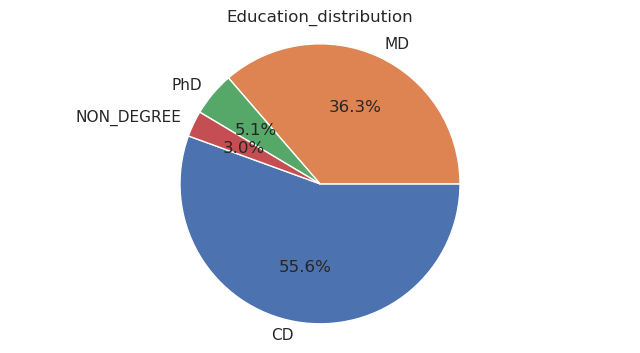

In [54]:
# Assuming Education_distribution is our Series
plt.figure(figsize=(8, 4))
plt.pie(Education_distribution, labels=Education_distribution.index, autopct='%1.1f%%', startangle=160)
plt.title('Education_distribution')
plt.axis('equal') 
plt.show()

#create a new variable "Demographics"   that could provide different approach to analising releation betveen "Gender" ,Education"   and Salary   

In [55]:
# Filter for specific groups  Professional_Education
filtered_df = df[df['Highest_Degree'].isin(['CD', 'MD', 'PhD'])]

# Calculate the total count for filtered groups
filtered_count = filtered_df['Highest_Degree'].count()

print("Total count for Professional_Education:", filtered_count)


Total count for Professional_Education: 26950


In [56]:
# Calculating % distribution of degrees
degree_distribution = df['Highest_Degree'].value_counts(normalize=True) * 100
for degree, percentage in degree_distribution.items():
    print(f"{degree}: {percentage:.2f}%")

CD: 55.56%
MD: 36.35%
PhD: 5.10%
NON_DEGREE: 3.00%


In [57]:
#  'df' with columns 'Highest Education Level' and 'Gender'
df['Demographics'] = df['Highest_Degree'] + '_' + df['Gender']

In [58]:
# identifying  categories/values in a new   column
df['Demographics'].unique()

array(['CD_WOMAN', 'CD_MAN', 'MD_WOMAN', 'PhD_MAN', 'NON_DEGREE_WOMAN',
       'MD_MAN', 'NON_DEGREE_NON-BINARY', 'CD_NON-BINARY', 'CD_NO_GENDER',
       'NON_DEGREE_MAN', 'MD_NON-BINARY', 'PhD_NON-BINARY', 'PhD_WOMAN',
       'MD_NO_GENDER', 'NON_DEGREE_NO_GENDER', 'PhD_NO_GENDER'],
      dtype=object)

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip       clean new string [Demographics]    from  whitespaces, standartise values names 

In [59]:
#  clean and standartise string
df['Demographics'] = df['Demographics'].str.upper()
df['Demographics'] = df['Demographics'].str.strip()


In [60]:
# Filter for specific groups  Woman_Education
filtered_df = df[df['Demographics'].isin(['CD_WOMAN', 'MD_WOMAN', 'PHD_WOMAN'])]

# Calculate the total count for filtered groups
filtered_count = filtered_df['Demographics'].count()

print("Total count for Woman_Higer_degree:", filtered_count)


Total count for Woman_Higer_degree: 20715


In [61]:
#Assuming, WOMAN is a magor group for Degree, find distribution,%
total_women_higher_degree = 20715
total_professionals = 26950
#percentage of women with higher degrees
percentage_women_higher_degree = (total_women_higher_degree / total_professionals) * 100
# Print the percentage with two decimal places
print(f"Percentage of Women with Higher Degrees: {percentage_women_higher_degree:.2f}%")

Percentage of Women with Higher Degrees: 76.86%


In [62]:
 #clean and standartise string
df['Age'] = df['Age'].str.upper()
df['Age'] = df['Age'].str.strip()

In [63]:
df['Age'].unique()

array(['18-24', '25-34', '45-54', '35-44', '55-64', 'UNDER 18',
       '65 OR OVER'], dtype=object)

In [64]:


# Mapping old age groups to new ones
age_group_mapping = {
    '18-24': '18-25',
    '25-34': '25-35',
    '35-44': '35-50',
    '45-54': '35-50',  # Merging 35-44 and 45-54 into 35-50
    '55-64': '50-65',
    '65 OR OVER': '65+',
    'UNDER 18': '18'  # Keep 'UNDER 18' as it is
}

# Replace old age group labels with new ones
df['Age'] = df['Age'].replace(age_group_mapping)

# Show the updated DataFrame
df['Age'].unique()

array(['18-25', '25-35', '35-50', '50-65', '18', '65+'], dtype=object)

In [65]:
#create a new value 
df['Age_group'] = df['Age'] + '_' + df['Gender']

In [66]:
# Sort df'Total_Income' in ascending order
df_sorted = df.sort_values(by='Total_Income', ascending=False)
df_sorted[['Total_Income', 'Currency', 'Job title', 'Highest_Degree','Age_group']].head(5)



,Total_Income,Currency,Job title,Highest_Degree,Age_group
3605,102000000,COP,Operations Manager,CD,25-35_MAN
24443,21800000,JPY,Voice Actor,CD,25-35_MAN
10654,11500000,JPY,Compliance Manager,MD,25-35_WOMAN
26980,10000000,JPY,Regional Sales Manager,MD,25-35_MAN
18027,9400000,JPY,Backend system dev,PhD,25-35_MAN


#clean data for range columns ‘Age’ , ‘Work Exp’ , ‘ Rel_exp’ :extract text, find unique groups /

In [67]:
# identifying columns with missing data in updated df
print(df.isnull().sum())


Age               0
Industry          0
Job title         0
Job context       0
Annual Salary     0
Bonus             0
Currency          0
Currency other    0
Country           0
State             0
City              0
Work_Exp          0
Rel_Exp           0
Highest_Degree    0
Gender            0
Total_Income      0
Demographics      0
Age_group         0
dtype: int64


In [68]:
# identifying  number of unoque  values in 'Industry'
unique_industries = df['Industry'].nunique()
print("Number of unique industries:", unique_industries)

Number of unique industries: 1198


In [69]:
# identifying  categories/values in a'Work_Exp' column
df['Work_Exp'].unique()

array(['2 - 4 years', '8 - 10 years', '11 - 20 years', '5-7 years',
       '21 - 30 years', '31 - 40 years', '41 years or more',
       '1 year or less'], dtype=object)

In [70]:
df['Country'].unique()

array(['Canada', 'Colombia', 'Japan', 'Usa', 'China', 'Japan ', 'japan',
       'United States', 'USA', 'Sweden', 'Singapore', 'Taiwan',
       'South Africa', 'US', 'Denmark', 'South Africa ', 'India',
       'Australia ', 'USA ', 'United Kingdom', 'UK', 'usa', 'Germany',
       'United Stated', 'South africa', 'Us', 'Sweden ', 'U.S.',
       'United States ', 'Norway ', 'united states', 'Norway', 'England',
       'denmark', 'Uk', 'U. S ', 'United states', 'Hong Kong', 'Canada ',
       'France', 'United Status', 'Usa ', 'New Zealand',
       'United States of America', 'NZ', 'Australia', 'U.S', 'Nigeria',
       'Switzerland', 'U.S.A.', 'UK ', 'United states ', 'United STates',
       'Israel', 'canada', 'us', 'New Zealand ', 'United Kingdom ',
       'Spain', 'Vietnam', 'united States', 'The US', 'US ', 'U.A.',
       'Australian ', 'America', 'United Stattes', 'U.S.A', 'Global',
       'Ireland', 'Belgium',
       'From New Zealand but on projects across APAC', 'Unites states ',
 

After filtering unique values in a 'Country' string, Identifying missliding data and manually replase it :extract Country name or consider it missing, and  maark as 'Unknown'  using   .replace({'old_value1': 'new_value1'}).Using replace method clean 'Country'   from 

In [71]:
#using reolace method , clean names form '.'
df['Country'] = df['Country'].str.replace('\.', '', regex=True)

In [72]:
#Remove parentheses using regular expression and replace method 
df['Country'] = df['Country'].str.replace(r'\(|\)', '', regex=True)

In [73]:
# Replace the emoji with 'USA'
df['Country'] = df['Country'].str.replace('🇺🇸', 'USA')

i  got a "SyntaxError: invalid decimal literal" ,seems  Python  misinterpreting the '3rd' in "3rd party assessment" as a decimal number for "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located"  , I  use regular expression to  handle this 

In [74]:
import 

df['Country'] = df['Country'].str.replace(r"We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located", "Unknown", regex=True)

In [75]:
df['Country'] = df['Country'].str.replace('Worldwide based in US but short term trips aroudn the world', 'USA')

In [76]:
df['Country'] = df['Country'].str.replace(r"United States I work from home and my clients are all over the US/Canada/PR","USA", regex=True)

In [77]:
# Replace values with 'USA'
df['Country'] = df['Country'].replace({'For the United States government, but posted overseas': 'USA',
                                        'USA, but for foreign gov\'t': 'USA',
                                        'US govt employee overseas, country withheld': 'USA'})

In [78]:

df['Country'] = df['Country'].str.replace(r"$2,17584/year is deducted for benefits", "Unknown", regex=True)

In [79]:
df['Country'] = df['Country'].str.replace(r"I earn commission on sales If I meet quota, I'm guaranteed another 16k min Last year i earned an additional 27k It's not uncommon for people in my space to earn 100k+ after commission", "Unknown", regex=True)

In [80]:
df['Country'] = df['Country'].str.replace('USA company is based in a USA territory, I work remote', 'USA')

In [81]:
df['Country'] = df['Country'].str.replace('I am located in Canada but I work for a company in the US', 'USA')

In [82]:
df['Country'] = df['Country'].str.replace(r"I earn commission on sales If I meet quota, I'm guaranteed another 16k min Last year i earned an additional 27k It's not uncommon for people in my space to earn 100k+ after commission", "Unknown", regex=True)

In [83]:
# Regular expression to match variations of USA and United States  use $   to mark end ($) of the string, 
usa_pattern = re.compile(r"^(USA|US|United States)$", flags=re.IGNORECASE)
# Replace matches with "USA", case-insensitive
df['Country'] = df['Country'].str.replace(usa_pattern, 'USA', regex=True)


In [84]:
df['Country'] = df['Country'].str.replace('United States','USA')


I naoticed multiply USA entityes to standartise it , i use strip()    and upper()   functions 

In [85]:
# make   all upper 
df['Country'] = df['Country'].str.upper()

In [86]:
df['Country'] = df['Country'].str.strip()

I found a  464 group with name USA OF AMERICA'  ,I replase it with USA, but use  case sensitive function  case=False)

In [87]:
df['Country'] = df['Country'].str.replace('USA OF AMERICA', 'USA', case=False)

In [88]:
# Frequency table for 'country   updated
Country_distribution = df['Country'].value_counts()

print(Country_distribution)

USA               22889
CANADA             1672
UK                  696
UNITED KINGDOM      633
AUSTRALIA           383
                  ...  
UNITES KINGDOM        1
CANADW                1
UNITEF STATED         1
NL                    1
UKRAINE               1
Name: Country, Length: 219, dtype: int64


In [89]:
# Determine the distribution of categorical variables (e.g., Industry)
# Frequency table for 'Industry'
industry_distribution = df['Industry'].value_counts()

print(industry_distribution)



Computing or Tech                       4633
Education (Higher Education)            2447
Nonprofits                              2406
Health care                             1879
Government and Public Administration    1877
                                        ... 
Hospital                                   1
Environmental Planning                     1
Architecture/Construction                  1
Information sciences                       1
Freelance Journalism                       1
Name: Industry, Length: 1198, dtype: int64


In [90]:
# Frequency table for 'Job title
# Frequency table for 'Job title'
Job_distribution = df['Job title'].value_counts()

print(Job_distribution)

Software Engineer                  283
Project Manager                    227
Director                           198
Senior Software Engineer           194
Program Manager                    152
                                  ... 
Collection Management Librarian      1
Engineer I                           1
Investment Supervisor (Media)        1
Liaison Librarian                    1
Software Development Lead            1
Name: Job title, Length: 14217, dtype: int64


In [91]:
# identifying  categories/values in a targeted  variable 'Annual Salary' column
df['Job title'].unique()

array(['Investment Banking Analyst', 'Operations Manager', 'Voice Actor',
       ..., 'Senior Director, ESG and Investor Relations',
       'Community Project Manager', 'Software Development Lead'],
      dtype=object)

In [92]:
#  clean and standartise string
df['Job title'] = df['Job title'].str.upper()
df['Job title'] = df['Job title'].str.strip()

In [93]:
# Identify duplicate rows where  in 'Job title' is 'Student' as most of responders - professionals 
duplicate_rows_df = df[df.duplicated(subset=['Job title'], keep=False) & (df['Job title'] == 'STUDENT')]

# Drop duplicate rows
df = df.drop(duplicate_rows_df.index)

In [94]:
#Find a number of Jobs related to Software , using keywords 
keywords = ['Software', 'Lead',  'Senior Software Engineer', 'Program Manager']

# Filter the DataFrame based on keywords in the 'Job Title' column
Job_filtered_df = df[df['Job title'].str.contains('|'.join(keywords), case=False)]

# Print the filtered DataFrame
print(Job_filtered_df['Job title'])

28043                                   LEAD
6783             PRINCIPAL SOFTWARE ENGINEER
1449                             DESIGN LEAD
4206                       SOFTWARE ENGINEER
17209         DIRECTOR, SOFTWARE DEVELOPMENT
                        ...                 
26015               SENIOR SOFTWARE ENGINEER
25830                      SOFTWARE ENGINEER
19434                      SOFTWARE ENGINEER
27631    SOFTWARE ENGINEER TECHNICAL SUPPORT
8999               SOFTWARE DEVELOPMENT LEAD
Name: Job title, Length: 2203, dtype: object


In [95]:
sorted_df = Job_filtered_df.sort_values(by='Total_Income', ascending=False)

# Print the desired columns from the sorted copy
sorted_df[['Total_Income', 'Age', 'Demographics', 'Currency', 'Job title', 'Rel_Exp']].head()

,Total_Income,Age,Demographics,Currency,Job title,Rel_Exp
28043,2600000,25-35,NON_DEGREE_MAN,USD,LEAD,2 - 4 years
6783,1675000,25-35,MD_MAN,USD,PRINCIPAL SOFTWARE ENGINEER,5-7 years
20420,1287000,35-50,CD_MAN,USD,SENIOR STAFF SOFTWARE ENGINEER,21 - 30 years
1449,1150000,35-50,CD_WOMAN,ZAR,DESIGN LEAD,11 - 20 years
4206,1100000,25-35,MD_WOMAN,USD,SOFTWARE ENGINEER,5-7 years


In [96]:
from datetime import datetime 

In [97]:
# Getting current date and time
current_time = datetime.now()

# Formatting the date and time in a readable format:
formatted_time = current_time.strftime('%B %d, %Y, %H:%M:%S')

In [98]:
# Print the formatted date and time
print(f"Salary_survey_0.ipynb was last run on: {formatted_time}")

Salary_survey_0.ipynb was last run on: November 06, 2024, 09:01:37


NEW DF for   USA  country ,find outliers  .For targeted category 'Annial salary'=  find MEan  and median

In [99]:
# Filter for US data
USA_filtered_df = df[df['Country'] == 'USA']

# Further filter for USD currency
USA_df_USD = USA_filtered_df[USA_filtered_df['Currency'] == 'USD']

# Sort by Total_Income in descending order
USA_df_USD_sorted = USA_df_USD.sort_values(by='Total_Income', ascending=False)

# Print the sorted DataFrame;''
USA_df_USD_sorted[['Total_Income', 'Age_group', 'Country','Job title', 'Rel_Exp','Highest_Degree']]


,Total_Income,Age_group,Country,Job title,Rel_Exp,Highest_Degree
26466,5004044,50-65_WOMAN,USA,INSIDE SALES MANAGER,21 - 30 years,MD
2124,3000000,50-65_WOMAN,USA,OWNER AND CEO,21 - 30 years,MD
28043,2600000,25-35_MAN,USA,LEAD,2 - 4 years,NON_DEGREE
26935,1950000,35-50_MAN,USA,MANAGING DIRECTOR,11 - 20 years,CD
5755,1900000,25-35_WOMAN,USA,ATTENDING PHYSICIAN (GENERAL INTERNAL MEDICINE),5-7 years,MD
...,...,...,...,...,...,...
19284,12000,35-50_WOMAN,USA,MUSIC LIBRARIAN,21 - 30 years,MD
26355,11800,25-35_WOMAN,USA,PRODUCER,8 - 10 years,CD
27585,11500,35-50_WOMAN,USA,ASSISTANT PROFESSOR,11 - 20 years,MD
18106,11100,18-25_MAN,USA,RESIDENT'S ASSISTANT,2 - 4 years,CD


In [100]:
# Calculate IQR and identify outliers
Q1 = filtered_df['Annual Salary'].quantile(0.25)
Q3 = filtered_df['Annual Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = filtered_df[(filtered_df['Annual Salary'] < Q1 - 1.5 * IQR) | (filtered_df['Annual Salary'] > Q3 + 1.5 * IQR)]

# Remove outliers (adjust as needed)
filtered_df_cleaned = filtered_df.drop(outliers.index)

# Calculate mean and median for cleaned data
mean_salary = filtered_df_cleaned['Annual Salary'].mean()
median_salary = filtered_df_cleaned['Annual Salary'].median()

print("Mean Annual Salary for USA ,(USD): {:.2f}".format(mean_salary))
print("Median Annual Salary for USA, (USD): {:.2f}".format(median_salary))

Mean Annual Salary for USA ,(USD): 77512.22
Median Annual Salary for USA, (USD): 72000.00


In [110]:
# Find top salary perfomance for  USA
filtered_df = df[df['Country'] == 'USA']

# Sort by 'Annual Salary' in descending order
sorted_df = filtered_df.sort_values(by='Total_Income', ascending=False)

# Select the top 'n' rows (adjust 'n' as needed)
top_USA_salaries = sorted_df.head(n=10)  # For example, top 10 salaries

# Print the desired columns
top_USA_salaries[['Total_Income', 'State', 'Industry', 'Demographics']]

,Total_Income,State,Industry,Demographics
26466,5004044,New Jersey,Sales,MD_WOMAN
15795,3600000,Alabama,Entertainment,CD_NON-BINARY
2124,3000000,New York,Art & Design,MD_WOMAN
28043,2600000,Florida,Computing or Tech,NON_DEGREE_MAN
26935,1950000,California,"Accounting, Banking & Finance",CD_MAN
5755,1900000,Connecticut,Health care,MD_WOMAN
6783,1675000,Massachusetts,Computing or Tech,MD_MAN
18279,1615000,California,"Accounting, Banking & Finance",CD_MAN
18322,1615000,California,"Accounting, Banking & Finance",CD_MAN
24955,1600000,District of Columbia,Health care,MD_WOMAN


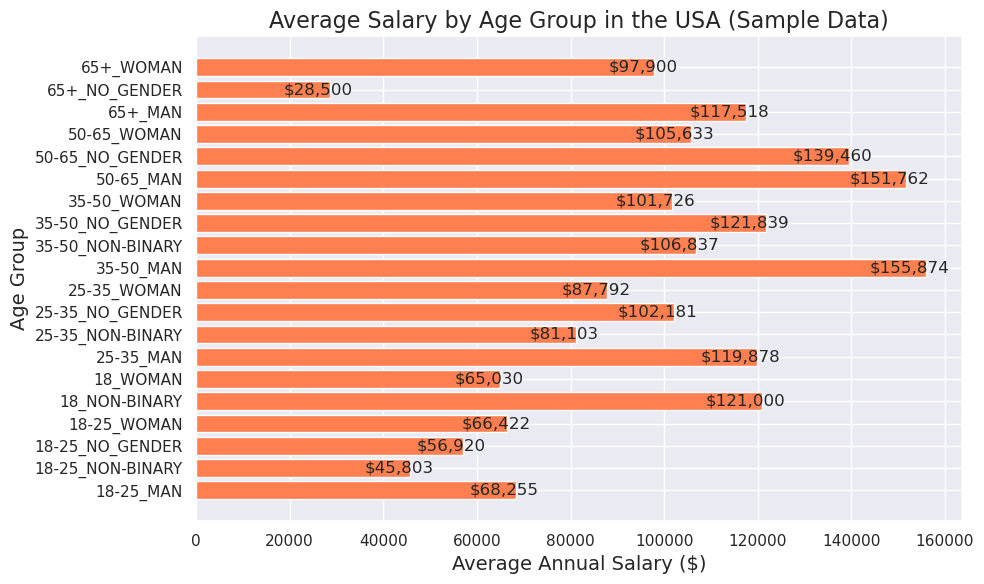

In [112]:
filtered_USA_df = sorted_df[sorted_df['Country'] == 'USA']

# Calculate average salary by age group
average_salary = filtered_USA_df.groupby('Age_group')['Total_Income'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(average_salary.index, average_salary.values, color='coral')

# Adding labels and title
plt.xlabel('Average Annual Salary ($)', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.title('Average Salary by Age Group in the USA (Sample Data)', fontsize=16)

# Adding average salary labels on top of each bar (adjusted x-offset)
for index, value in enumerate(average_salary.values):
    plt.text(value + 5000, index, f"${value:,.0f}", va='center', ha='right', fontsize=12)

plt.tight_layout()
plt.show()

For  visual representation (poster)   create a bar chat only for AGe/USA /USD as  I did not apply   currensy convertation methods ,so use unfiltered DF will represent misleading data .

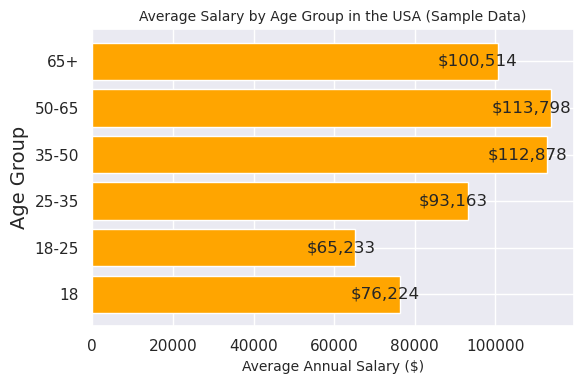

In [120]:
filtered_USA_df = sorted_df[sorted_df['Country'] == 'USA']

# Calculate average salary by age group
average_salary = filtered_USA_df.groupby('Age')['Total_Income'].mean()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.barh(average_salary.index, average_salary.values, color='orange')

# Adding labels and title
plt.xlabel('Average Annual Salary ($)', fontsize=10)
plt.ylabel('Age Group', fontsize=14)
plt.title('Average Salary by Age Group in the USA (Sample Data)', fontsize=10)

# Adding average salary labels on top of each bar (adjusted x-offset)
for index, value in enumerate(average_salary.values):
    plt.text(value + 5000, index, f"${value:,.0f}", va='center', ha='right', fontsize=12)

plt.tight_layout()
plt.show()

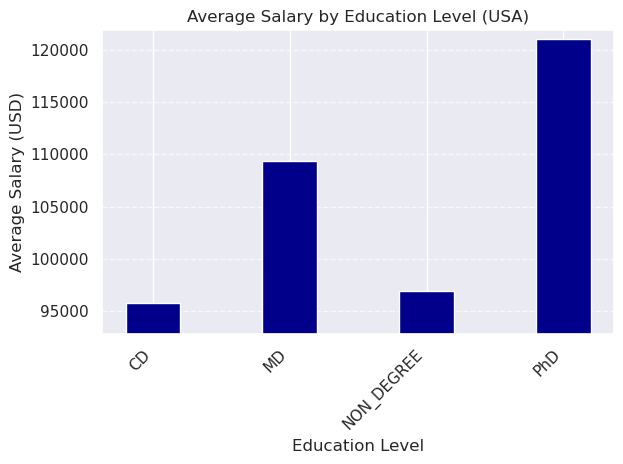

In [138]:
# Create bar chart for  average salary /education in the filtered df (USA )
filtered_USA_df = sorted_df[sorted_df['Country'] == 'USA']
# Calculate
average_salary = filtered_USA_df.groupby('Highest_Degree')['Total_Income'].mean()
# Extract unique education levels
education_levels = average_salary.index.to_numpy()  

education_level_positions = range(len(education_levels))
bar_width = 0.4 
# Plot bars for average salary
plt.bar(education_level_positions, average_salary, width=bar_width, label='Average Salary', color='darkblue')

# Set labels and title
plt.xticks(education_level_positions, education_levels, rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Average Salary (USD)')  # Clarify y-axis label
plt.title('Average Salary by Education Level (USA)')  # Update title

# Set y-axis limits slightly higher than the maximum salary
plt.ylim(min(average_salary) - 3000, max(average_salary) + 800)

# Display the plot with grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()